# Projet 12 : Détectez des faux billets

## 1. Introduction

L'objectif de ce projet est de construire un modèle d'apprentissage automatique capable de détecter les faux billets en fonction de leurs dimensions géométriques. Nous effectuerons les étapes suivantes :

1.  **Nettoyage des données** : Traiter les valeurs manquantes dans l'ensemble de données.
2.  **Analyse exploratoire des données (AED)** : Visualiser les données pour comprendre les relations et les distributions.
3.  **Apprentissage non supervisé** : Utiliser le clustering K-Means pour explorer les motifs dans les données.
4.  **Apprentissage supervisé** : Entraîner un modèle de régression logistique pour classifier les billets.
5.  **Comparaison des modèles** : Comparer les performances des modèles.
6.  **Application** : Démontrer comment utiliser le modèle entraîné pour les prédictions.
7.  **Déploiement du modèle** : Démontrer comment utiliser le modèle entraîné pour les prédictions.
8.  **Conclusion** : Résumer les résultats et les conclusions.


### Ensemble de données
L'ensemble de données `billets.csv` contient les dimensions des billets et une étiquette binaire `is_genuine` indiquant si le billet est vrai ou faux.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, make_scorer, recall_score, precision_recall_curve, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/billets.csv', sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## 2. Nettoyage et Préparation des Données

Nous commençons par vérifier les valeurs manquantes dans l'ensemble de données.

In [5]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
df[df['margin_low'].isnull()]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


### Imputation des Valeurs Manquantes

La colonne `margin_low` contient des valeurs manquantes. Au lieu de les remplir simplement avec la moyenne ou la médiane, ce qui pourrait fausser la distribution, nous utilisons un modèle de **Régression Linéaire**. 
Nous prédisons `margin_low` en fonction des autres caractéristiques géométriques (`diagonal`, `height_left`, `height_right`, `margin_up`, `length`), qui sont probablement corrélées.

In [7]:
from sklearn.linear_model import LinearRegression

# Séparer les lignes complètes et incomplètes
df_complete = df[df['margin_low'].notna()]
df_missing = df[df['margin_low'].isna()]

# Entraîner le modèle de régression
X_train = df_complete[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']]
y_train = df_complete['margin_low']
model = LinearRegression().fit(X_train, y_train)

# Prédire les valeurs manquantes
df.loc[df['margin_low'].isna(), 'margin_low'] = model.predict(df_missing[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']])

In [8]:
df_compare = df_missing.copy()
df_compare['predicted_margin_low'] = model.predict(df_missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']])
df_compare[['margin_low', 'predicted_margin_low']]

,margin_low,predicted_margin_low
72,NaN,4.318525
99,NaN,4.393668
151,NaN,4.410457
197,NaN,4.319014
241,NaN,4.650617
251,NaN,3.803308
284,NaN,4.179736
334,NaN,4.127442
410,NaN,4.135034
413,NaN,4.160539


## 3. Analyse Exploratoire des Données (AED)

Nous visualisons les données pour comprendre la distribution des caractéristiques et la séparation entre les vrais et les faux billets.

In [9]:
print("Missing values after imputation:")
print(df.isnull().sum())
print(f"\nTarget distribution:\n{df['is_genuine'].value_counts()}")

Missing values after imputation:
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Target distribution:
is_genuine
True     1000
False     500
Name: count, dtype: int64


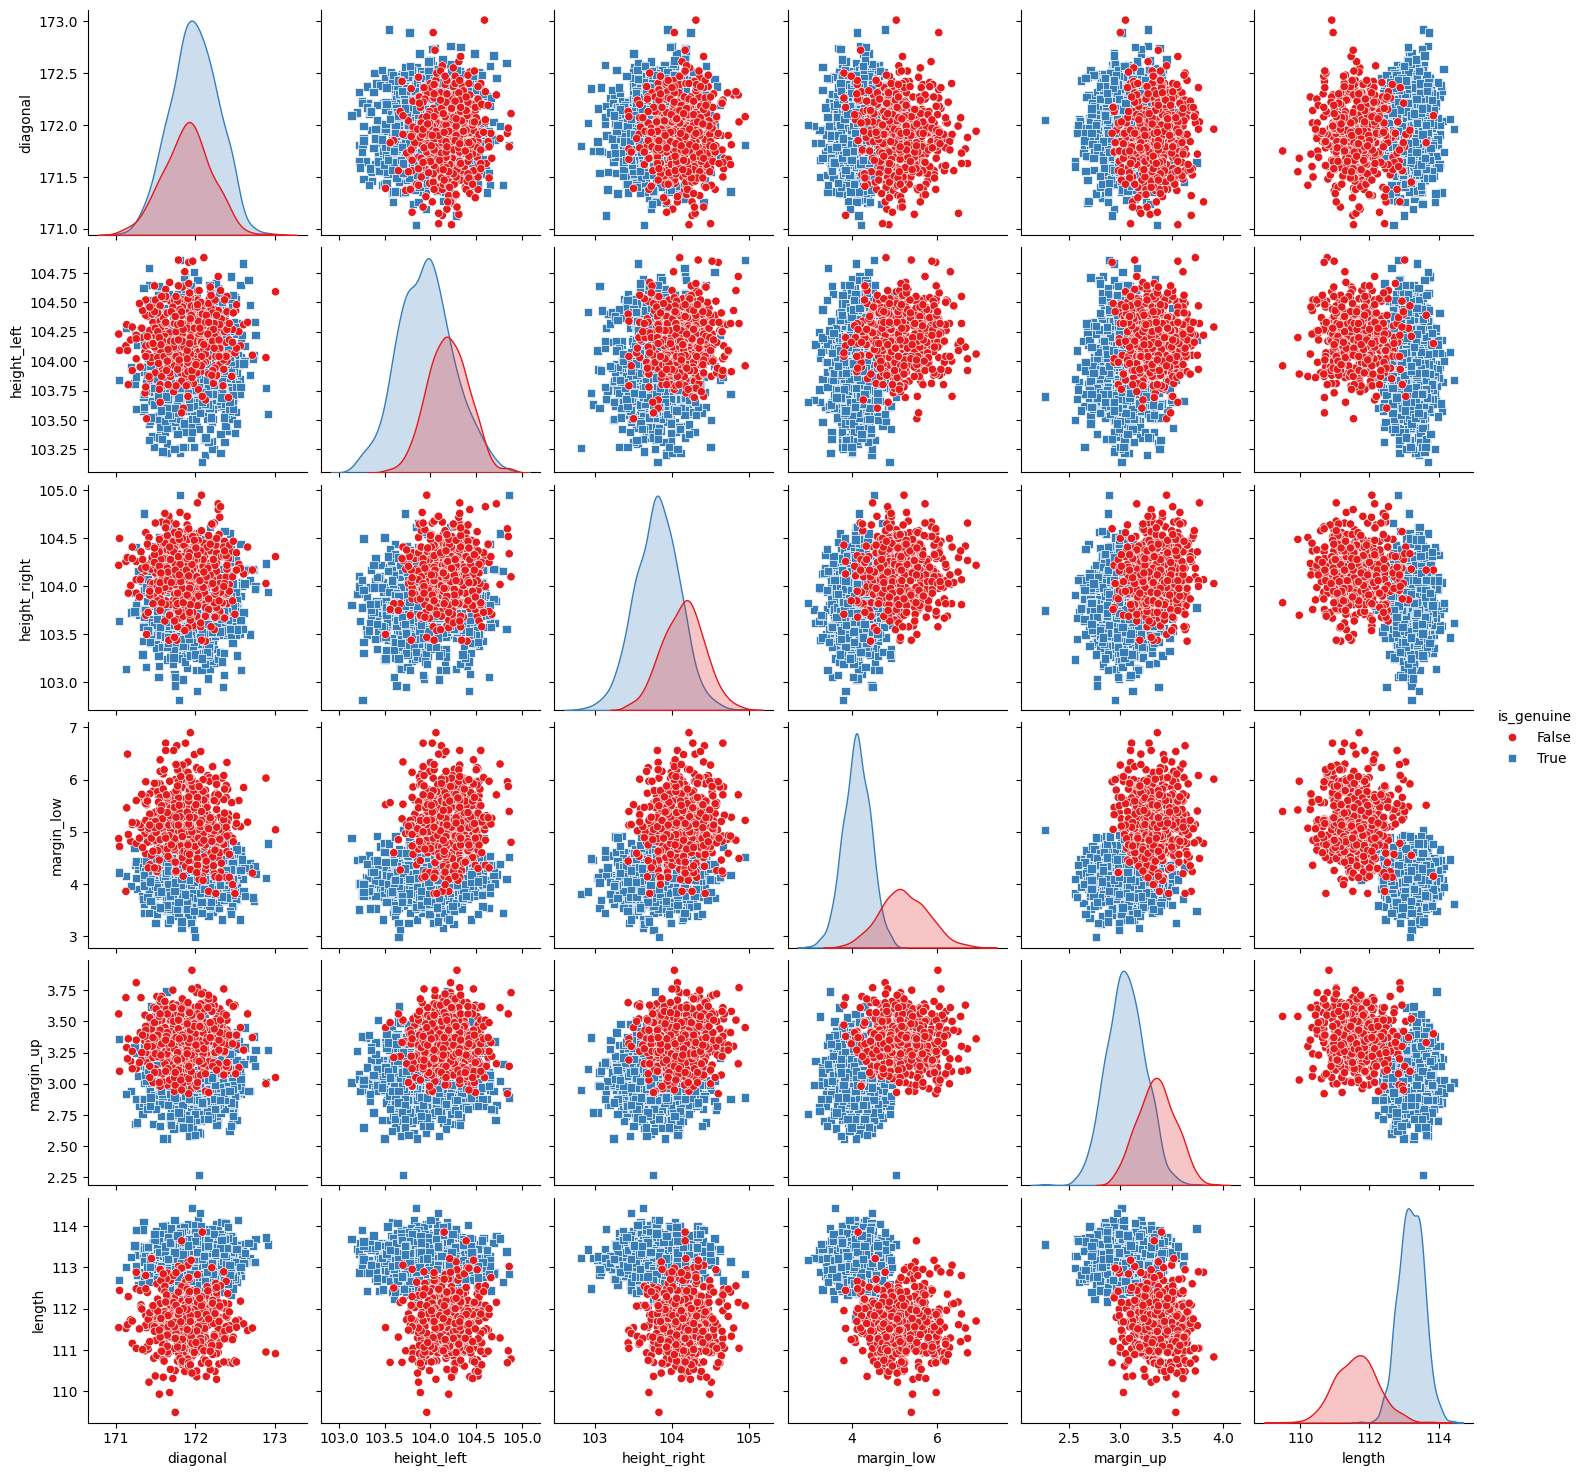

<Figure size 1000x800 with 0 Axes>

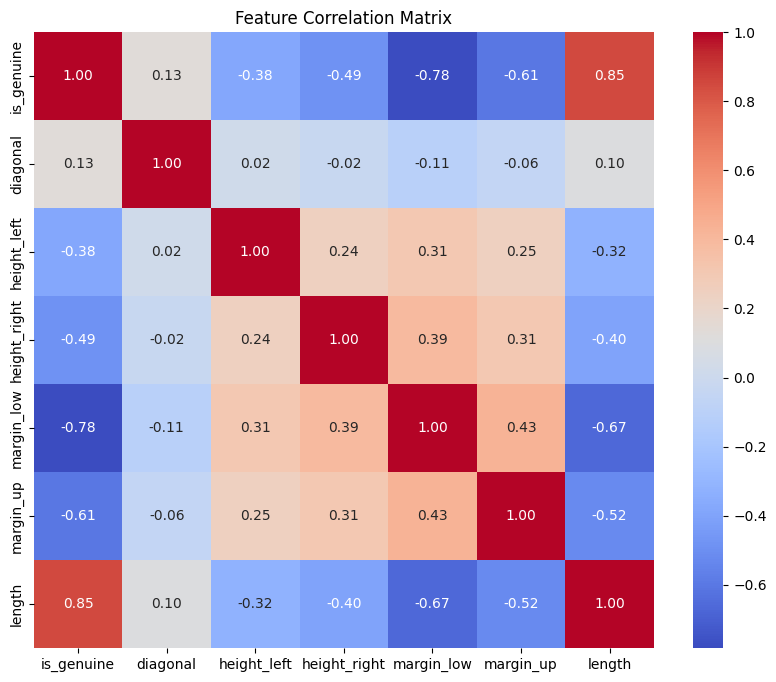

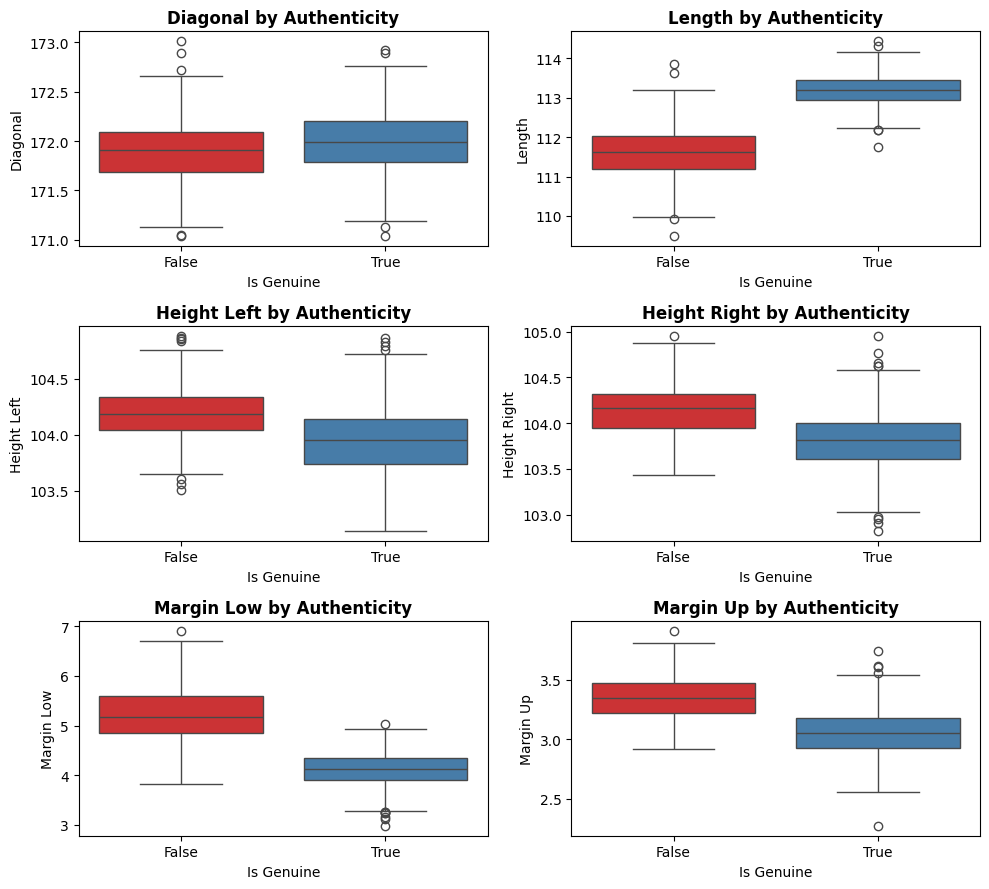

In [10]:
# Pairplot pour visualiser les relations
sns.pairplot(df, hue='is_genuine', palette='Set1', markers=['o', 's'])
plt.figure(figsize=(10, 8))
plt.suptitle("Pairplot of Banknote Dimensions", y=1.08)
plt.show()

# Carte de chaleur des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Boîtes à moustaches pour toutes les caractéristiques
features = ['diagonal', 'length', 'height_left', 'height_right', 'margin_low', 'margin_up']

fig, axes = plt.subplots(3, 2, figsize=(10, 9))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(x='is_genuine', y=feature, data=df, ax=axes[idx], palette='Set1')
    axes[idx].set_title(f'{feature.replace("_", " ").title()} by Authenticity', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Is Genuine', fontsize=10)
    axes[idx].set_ylabel(feature.replace("_", " ").title(), fontsize=10)

plt.tight_layout()
plt.show()
plt.show()

À partir du graphique, nous pouvons observer que la longueur, la marge basse et la marge haute ont une très forte corrélation avec la variable cible `is_genuine`. En revanche, la hauteur droite et gauche ont une corrélation modérée et la diagonale a une très faible corrélation avec les variables cibles.

De plus, les vrais billets ont tendance à avoir une longueur plus grande que les faux billets. En contraste, les faux billets ont tendance à avoir une hauteur droite et gauche plus grande et une marge basse et haute plus longue que les vrais billets.

## 4. Apprentissage Non Supervisé

In [11]:
# Préparer les données pour la modélisation
X = df.drop('is_genuine', axis=1)
y = df['is_genuine'].astype(int)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42, stratify=y
)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape[0]}")
print(f"Taille de l'ensemble de test: {X_test.shape[0]}")
print(f"\nDistribution de la cible dans l'ensemble d'entraînement:\n{y_train.value_counts()}")
print(f"\nDistribution de la cible dans l'ensemble de test:\n{y_test.value_counts()}")

Taille de l'ensemble d'entraînement: 1005
Taille de l'ensemble de test: 495

Distribution de la cible dans l'ensemble d'entraînement:
is_genuine
1    670
0    335
Name: count, dtype: int64

Distribution de la cible dans l'ensemble de test:
is_genuine
1    330
0    165
Name: count, dtype: int64


### K-means
Nous appliquons le clustering K-Means pour voir si les billets se regroupent naturellement en deux clusters (vrais vs faux) sans utiliser les étiquettes. Nous déterminerons le nombre optimal de clusters $k$ en utilisant la méthode du coude (Elbow Method) et le score de silhouette.

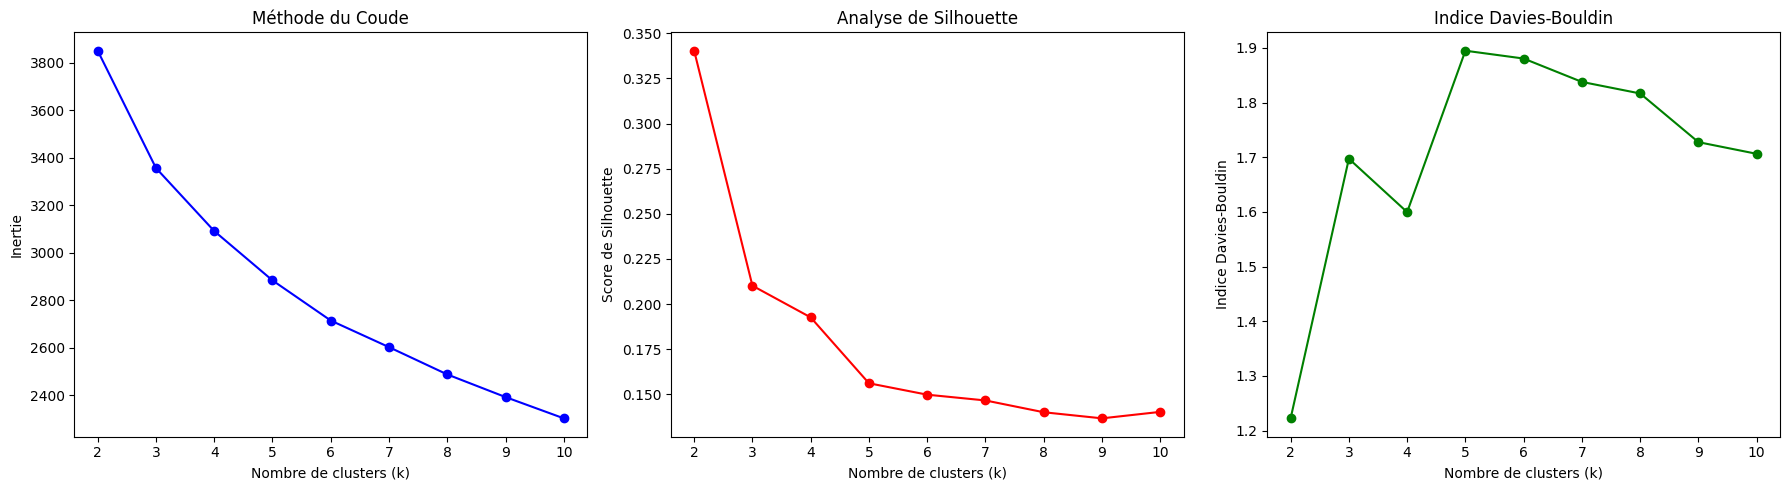

Scores de Silhouette: [0.3403224189050496, 0.21019229539783685, 0.19264927254407835, 0.15616714160498713, 0.1498438468162324, 0.14664952505900342, 0.1401170566664587, 0.13674392583678904, 0.14032212511472775]
Indices Davies-Bouldin: [1.2223267751773927, 1.6972396506646856, 1.5995989384898235, 1.8948297433572594, 1.8805028822019487, 1.8377547651946726, 1.8166037916246012, 1.7275568981091185, 1.7062150866165322]


In [12]:
# Algorithme 1 : Clustering K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Déterminer le nombre optimal de clusters
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_train, kmeans.labels_))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Nombre de clusters (k)')
axes[0].set_ylabel('Inertie')
axes[0].set_title('Méthode du Coude')

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Nombre de clusters (k)')
axes[1].set_ylabel('Score de Silhouette')
axes[1].set_title('Analyse de Silhouette')

axes[2].plot(K_range, davies_bouldin_scores, 'go-')
axes[2].set_xlabel('Nombre de clusters (k)')
axes[2].set_ylabel('Indice Davies-Bouldin')
axes[2].set_title('Indice Davies-Bouldin')

plt.tight_layout()
plt.show()

print("Scores de Silhouette:", silhouette_scores)
print("Indices Davies-Bouldin:", davies_bouldin_scores)

En fonction des scores de silhouette, nous choisissons k=2 pour le clustering K-Means car il a le score de silhouette le plus élevé de 0,34 et avec l'optimal de valeur Davies-Bouldin, ce qui est une valeur acceptable indiquant des clusters bien définis.

In [13]:
# Entraîner K-Means avec k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred_kmeans_train = kmeans.fit_predict(X_train)
y_pred_kmeans_test = kmeans.predict(X_test)

# Mapper les clusters aux vrais billets (1=vrai, 0=faux)
cluster_mapping = {}
for cluster in [0, 1]:
    cluster_genuine_ratio = y_train[y_pred_kmeans_train == cluster].sum() / (y_pred_kmeans_train == cluster).sum()
    cluster_mapping[cluster] = 1 if cluster_genuine_ratio > 0.5 else 0

y_pred_kmeans_test_mapped = np.array([cluster_mapping[c] for c in y_pred_kmeans_test])

print("Résultats K-Means:")
print(confusion_matrix(y_test, y_pred_kmeans_test_mapped))
print(classification_report(y_test, y_pred_kmeans_test_mapped, target_names=["Fake", "Genuine"], digits=4))

Résultats K-Means:
[[161   4]
 [  3 327]]
              precision    recall  f1-score   support

        Fake     0.9817    0.9758    0.9787       165
     Genuine     0.9879    0.9909    0.9894       330

    accuracy                         0.9859       495
   macro avg     0.9848    0.9833    0.9841       495
weighted avg     0.9858    0.9859    0.9858       495



## 5. Apprentissage Supervisé

### Régression Logistique

Nous utilisons la Régression Logistique comme modèle de référence. C'est un modèle simple et interprétable bien adapté aux tâches de classification binaire.

In [14]:
# Algorithme 2 : Régression Logistique
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight={0: 3, 1: 1})
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
y_pred_proba_logreg = log_reg.predict_proba(X_test)[:, 1]


print("Résultats de la Régression Logistique:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=['Fake', 'Genuine'], digits=4))
print(f"Score ROC-AUC: {roc_auc_score(y_test, y_pred_proba_logreg):.4f}")

Résultats de la Régression Logistique:
[[164   1]
 [  6 324]]
              precision    recall  f1-score   support

        Fake     0.9647    0.9939    0.9791       165
     Genuine     0.9969    0.9818    0.9893       330

    accuracy                         0.9859       495
   macro avg     0.9808    0.9879    0.9842       495
weighted avg     0.9862    0.9859    0.9859       495

Score ROC-AUC: 0.9994


### KNN

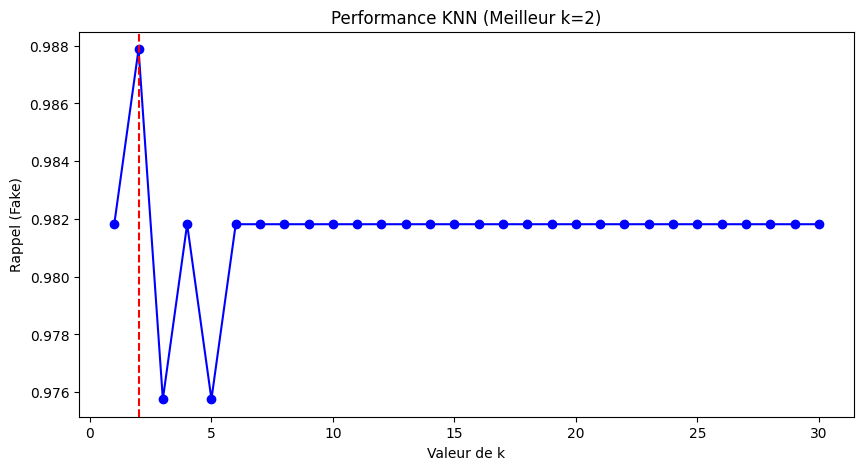

Résultats KNN (k=2):
[[162   3]
 [  3 327]]
              precision    recall  f1-score   support

        Fake     0.9818    0.9818    0.9818       165
     Genuine     0.9909    0.9909    0.9909       330

    accuracy                         0.9879       495
   macro avg     0.9864    0.9864    0.9864       495
weighted avg     0.9879    0.9879    0.9879       495

ROC-AUC (Fake class): 0.9921


In [15]:
# Algorithme 3 : KNN
from sklearn.neighbors import KNeighborsClassifier

# Trouver le k optimal
recall_fake_scores = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Compute recall for fake bills (class 0)
    recall_fake = recall_score(y_test, y_pred, pos_label=0)
    recall_fake_scores.append(recall_fake)

best_k = k_values[np.argmax(recall_fake_scores)]
plt.figure(figsize=(10, 5))
plt.plot(k_values, recall_fake_scores, 'bo-')
plt.xlabel('Valeur de k')
plt.ylabel('Rappel (Fake)')
plt.title(f'Performance KNN (Meilleur k={best_k})')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.show()

# Train final KNN
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 0]  # probability for Fake class

# Metrics
roc_auc = roc_auc_score(y_test==0, y_pred_proba_knn)

print(f"Résultats KNN (k={best_k}):")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=["Fake", "Genuine"], digits=4))
print(f"ROC-AUC (Fake class): {roc_auc:.4f}")


### Classificateur Random Forest

Résultats de la Forêt Aléatoire:
[[162   3]
 [  2 328]]
              precision    recall  f1-score   support

        Fake     0.9878    0.9818    0.9848       165
     Genuine     0.9909    0.9939    0.9924       330

    accuracy                         0.9899       495
   macro avg     0.9894    0.9879    0.9886       495
weighted avg     0.9899    0.9899    0.9899       495

Score ROC-AUC: 0.9992


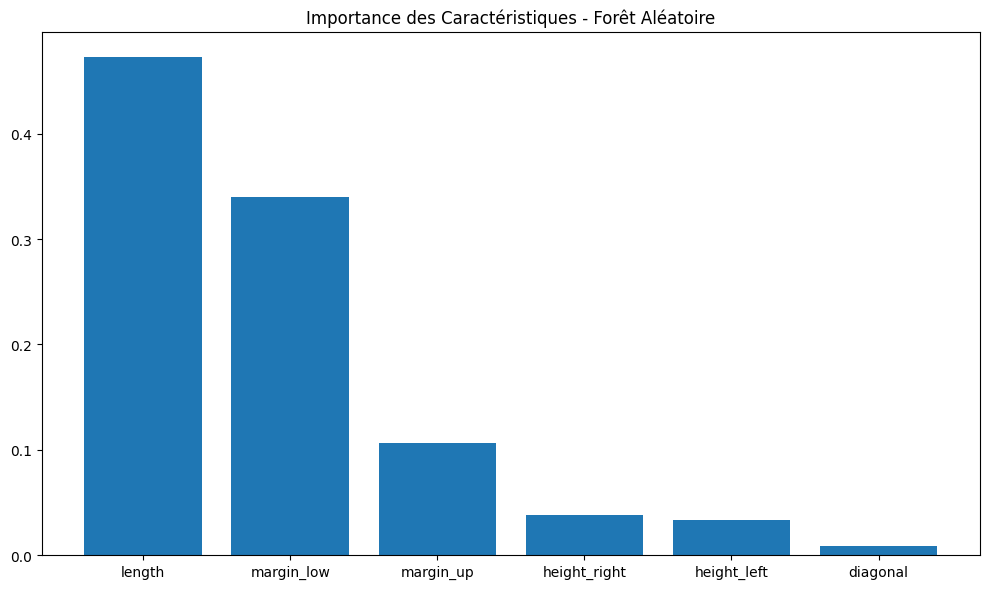

In [16]:
# Algorithme 4 : Forêt Aléatoire
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Résultats de la Forêt Aléatoire:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=['Fake', 'Genuine'], digits=4))
print(f"Score ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Importance des caractéristiques
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Importance des Caractéristiques - Forêt Aléatoire')
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=0)
plt.tight_layout()
plt.show()

### SVM

In [17]:
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.01,0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced', {0: 1.5, 1: 0.75}, {0: 2, 1: 1}, {0:3, 1:1} ]
}

# Grid search using recall on fake bills
scorer = make_scorer(recall_score, pos_label=False)

grid = GridSearchCV(
    svm,
    param_grid,
    scoring=scorer,
    cv=10,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

print("Best parameters:", grid.best_params_)
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["Fake", "Genuine"], digits=4))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'C': 0.01, 'class_weight': {0: 3, 1: 1}, 'gamma': 'scale', 'kernel': 'rbf'}

Classification report:
              precision    recall  f1-score   support

        Fake     0.9762    0.9939    0.9850       165
     Genuine     0.9969    0.9879    0.9924       330

    accuracy                         0.9899       495
   macro avg     0.9866    0.9909    0.9887       495
weighted avg     0.9900    0.9899    0.9899       495


Confusion matrix:
[[164   1]
 [  4 326]]


### XGBoost

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(
    random_state=42,
    eval_metric='aucpr'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Fake", "Genuine"], digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Fake     0.9878    0.9818    0.9848       165
     Genuine     0.9909    0.9939    0.9924       330

    accuracy                         0.9899       495
   macro avg     0.9894    0.9879    0.9886       495
weighted avg     0.9899    0.9899    0.9899       495

Confusion Matrix:
[[162   3]
 [  2 328]]


## 6. Comparaison des Modèles

In [19]:
# Custom scorer for Fake Bill Recall (Class 0)
# In sklearn, recall_score with pos_label=0 calculates recall for the negative class
scoring = {
    'accuracy': 'accuracy',
    'recall_fake': make_scorer(recall_score, pos_label=0),
    'precision_fake': make_scorer(precision_score, pos_label=0),
    'f1_fake': make_scorer(f1_score, pos_label=0),
    'roc_auc': 'roc_auc'
}

models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight={0: 3, 1: 1}, max_iter=1000), 
    'KNN': KNeighborsClassifier(n_neighbors=2),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(C=0.01, class_weight={0: 3, 1: 1}, gamma='scale', kernel='rbf'),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='aucpr')
}

print("Lancement de la validation croisée (10-fold)")

results = []
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"  Evaluation de {name}")
    cv_results = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)
    
    for i in range(10):
        results.append({
            'Model': name,
            'Fold': i,
            'Accuracy': cv_results['test_accuracy'][i],
            'Recall (Fake)': cv_results['test_recall_fake'][i],
            'Precision (Fake)': cv_results['test_precision_fake'][i],
            'F1-Score (Fake)': cv_results['test_f1_fake'][i],
            'ROC AUC': cv_results['test_roc_auc'][i]
        })

df_results = pd.DataFrame(results)

summary = df_results.groupby('Model').agg({
    'Recall (Fake)': ['mean', 'std'],
    'Accuracy': ['mean', 'std'],
    'F1-Score (Fake)': ['mean', 'std'],
    'ROC AUC': ['mean', 'std']
}).sort_values(('Recall (Fake)', 'mean'), ascending=False)

print(summary)

Lancement de la validation croisée (10-fold)
  Evaluation de Logistic Regression
  Evaluation de KNN
  Evaluation de Random Forest
  Evaluation de SVM
  Evaluation de XGBoost
                    Recall (Fake)            Accuracy            \
                             mean       std      mean       std   
Model                                                             
Logistic Regression         0.988  0.016865  0.988000  0.012881   
SVM                         0.988  0.013984  0.986000  0.010159   
XGBoost                     0.986  0.013499  0.990667  0.010517   
KNN                         0.984  0.015776  0.983333  0.011440   
Random Forest               0.980  0.021082  0.991333  0.009454   

                    F1-Score (Fake)            ROC AUC            
                               mean       std     mean       std  
Model                                                             
Logistic Regression        0.982196  0.019085  0.99864  0.002436  
SVM                 

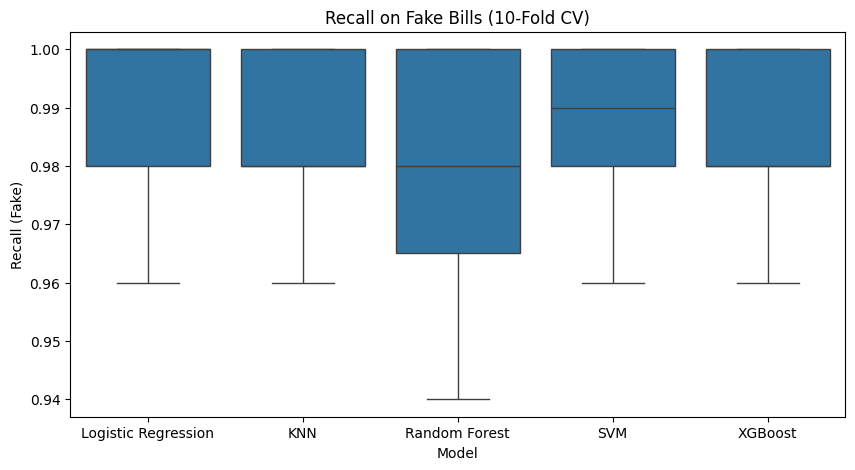

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_results, x='Model', y='Recall (Fake)')
plt.title("Recall on Fake Bills (10-Fold CV)")
plt.show()


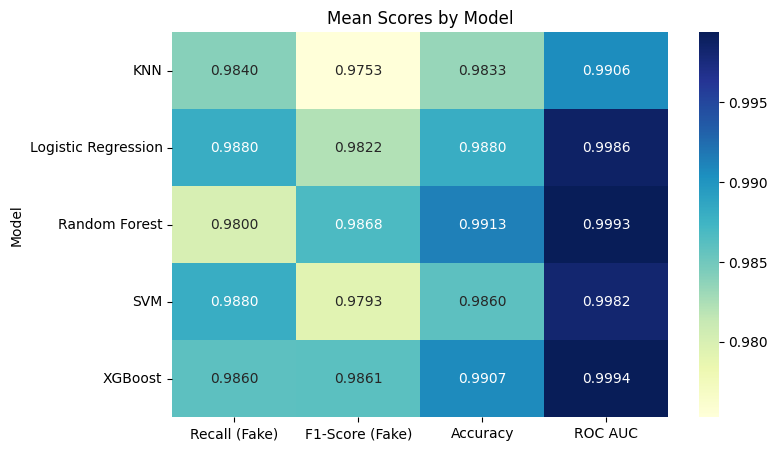

In [21]:
metrics = ['Recall (Fake)', 'F1-Score (Fake)', 'Accuracy', 'ROC AUC']
summary = df_results.groupby('Model')[metrics].mean()
plt.figure(figsize=(8,5))
sns.heatmap(summary, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Mean Scores by Model")
plt.show()


## 7. Application 

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Charger et préparer les données (comme dans le notebook principal)
df = pd.read_csv('datasets/billets.csv', sep=';')

from sklearn.linear_model import LinearRegression
df_complete = df[df['margin_low'].notna()]
df_missing = df[df['margin_low'].isna()]

X_train_impute = df_complete[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train_impute = df_complete['margin_low']
model_impute = LinearRegression().fit(X_train_impute, y_train_impute)

df.loc[df['margin_low'].isna(), 'margin_low'] = model_impute.predict(
    df_missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
)

# Préparer et normaliser les données
X = df.drop('is_genuine', axis=1)
y = df['is_genuine'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42, stratify=y
)

# Entraîner le modèle 
final_model = LogisticRegression(random_state=42, class_weight={0: 3, 1: 1}, max_iter=1000)
final_model.fit(X_train, y_train)

# Sauvegarder le modèle et le scaler pour une utilisation ultérieure
import joblib
joblib.dump(final_model, 'models/best_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Le modèle a été entraîné et sauvegardé avec succès!")
print(f"Précision du modèle sur l'ensemble de test: {final_model.score(X_test, y_test):.4f}")

Le modèle a été entraîné et sauvegardé avec succès!
Précision du modèle sur l'ensemble de test: 0.9859


## 8. Déploiement du Modèle

Nous avons sauvegardé notre meilleur modèle et notre scaler. Nous pouvons maintenant utiliser le script `predict_banknote.py` pour classifier de nouveaux billets.

### Exemple d'Utilisation
Voici un exemple de comment exécuter le script depuis la ligne de commande (ou le notebook).

`!python predict_banknote.py --diagonal 171.81 --height_left 104.86 --height_right 104.95 --margin_low 4.52 --margin_up 2.89 --length 112.83`

## 9. Conclusion

Dans ce projet, nous avons réussi à :
1.  Nettoyer les données en utilisant l'imputation par régression linéaire.
2.  Visualiser les différences entre les vrais et les faux billets.
3.  Construire un modèle de régression logistique avec une grande précision.
4.  Vérifier la structure des données en utilisant le clustering K-Means.
5.  Implémenter un script de déploiement pour effectuer des prédictions.

Le modèle est robuste et prêt à être utilisé.